In [ ]:
!pip install mlflow
!pip install scikit-optimize
!pip install xgboost
!pip install lightgbm
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/9

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import os
import mlflow
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
mlflow.set_tracking_uri('/content/drive/MyDrive/ColabOutputs/MLflowRuns')

Mounted at /content/drive


NameError: name 'mlflow' is not defined

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/final.csv')

In [ ]:
df=df.drop(['card_id.1','card_id_','trans_purchase_date_max','trans_purchase_date_min','merchant_id_mode'],axis = 1)

X=df.drop(columns=['target','card_id'])
y=df['target']

In [ ]:
X.columns.tolist()

['trans_purchase_year_mode',
 'trans_purchase_month_mean',
 'trans_purchase_month_mode',
 'trans_purchase_day_mode',
 'trans_purchase_dow_mode',
 'trans_purchase_hour_min',
 'trans_purchase_hour_max',
 'trans_purchase_hour_mode',
 'trans_is_weekend_mean',
 'trans_is_weekend_sum',
 'trans_is_weekend_mode',
 'trans_month_difference_sum',
 'trans_month_difference_mean',
 'trans_month_difference_min',
 'trans_month_difference_max',
 'first_transaction',
 'last_transaction',
 'trans_purchase_amount_sum',
 'trans_purchase_amount_max',
 'trans_purchase_amount_min',
 'trans_purchase_amount_mean',
 'trans_purchase_amount_median',
 'authorized_flag_sum',
 'authorized_flag_mean',
 'city_id_mode',
 'city_id_nunique',
 'category_1_sum',
 'category_1_mean',
 'category_1_mode',
 'category_2_sum',
 'category_2_mean',
 'category_2_mode',
 'category_3_sum',
 'category_3_mean',
 'category_3_mode',
 'installments_mean',
 'installments_sum',
 'installments_min',
 'installments_max',
 'installments_mode',
 

In [ ]:
X.head()

,trans_purchase_year_mode,trans_purchase_month_mean,trans_purchase_month_mode,trans_purchase_day_mode,trans_purchase_dow_mode,trans_purchase_hour_min,trans_purchase_hour_max,trans_purchase_hour_mode,trans_is_weekend_mean,trans_is_weekend_sum,...,feature_min,feature_std,feature_range,feature_sum_x_days,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,days_feature_3_ratio
0,2017.0,7.670213,12.0,11.0,5.0,0.0,23.0,14.0,0.340426,96.0,...,1,2.081666,4,792,495,0.050505,198,0.020202,99,0.010101
1,2017.0,6.169972,1.0,19.0,5.0,0.0,23.0,12.0,0.371105,131.0,...,0,2.081666,4,495,396,0.040404,99,0.010101,0,0.000000
2,2017.0,4.545455,4.0,21.0,4.0,8.0,23.0,19.0,0.272727,12.0,...,0,1.154701,2,444,222,0.018018,222,0.018018,0,0.000000
3,2017.0,7.481481,10.0,7.0,2.0,0.0,23.0,16.0,0.160494,13.0,...,0,2.081666,4,693,396,0.040404,297,0.030303,0,0.000000
4,2018.0,5.061350,1.0,7.0,4.0,0.0,23.0,11.0,0.331288,54.0,...,0,1.527525,3,396,99,0.010101,297,0.030303,0,0.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlflow.autolog()


model = DecisionTreeRegressor()
base_model=model.fit(X_train, y_train)

In [ ]:
importances_DT=base_model.feature_importances_
feature_names=X.columns

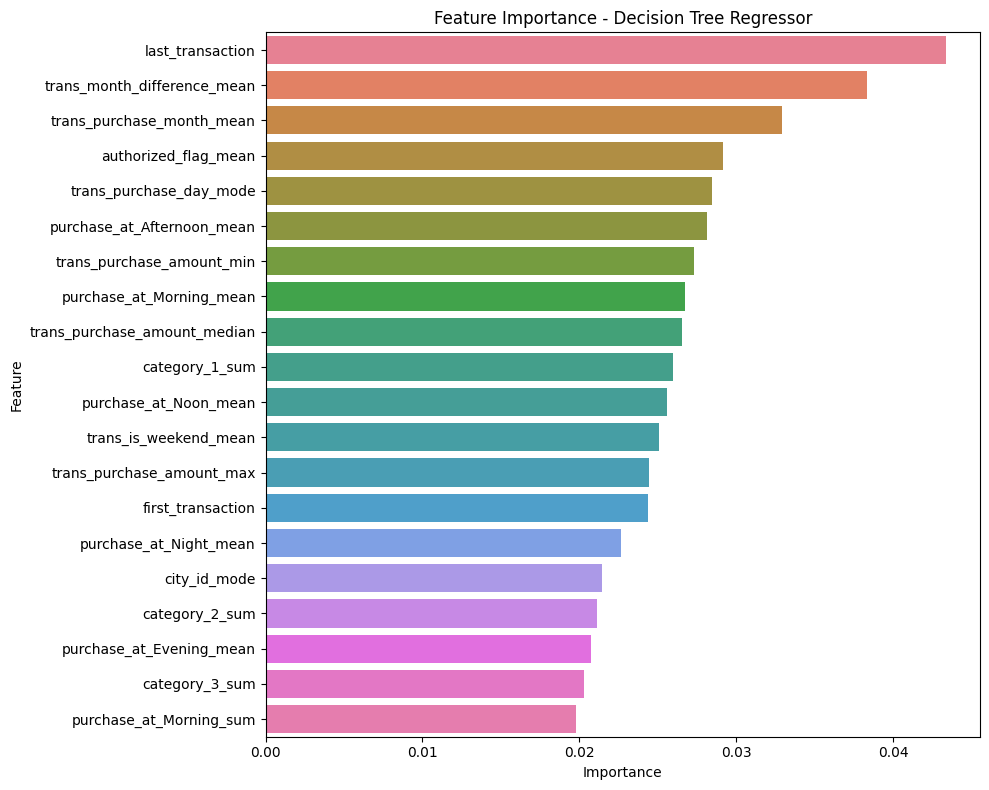

In [ ]:
feature_imp_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances_DT})
    .sort_values(by='Importance', ascending=False)
)
top_20_features = feature_imp_df.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features,hue='Feature')
plt.title('Feature Importance - Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

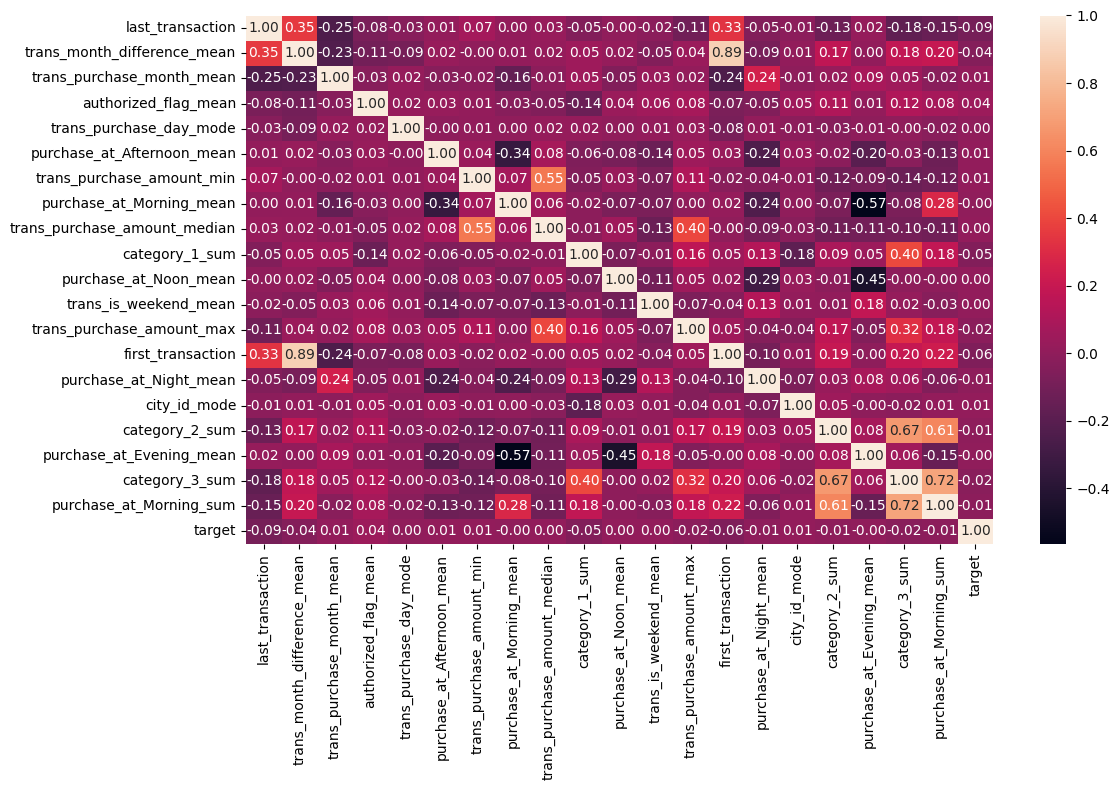

In [ ]:
top_20_features_list=top_20_features.Feature.tolist()
corr = df[top_20_features_list+ ['target']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

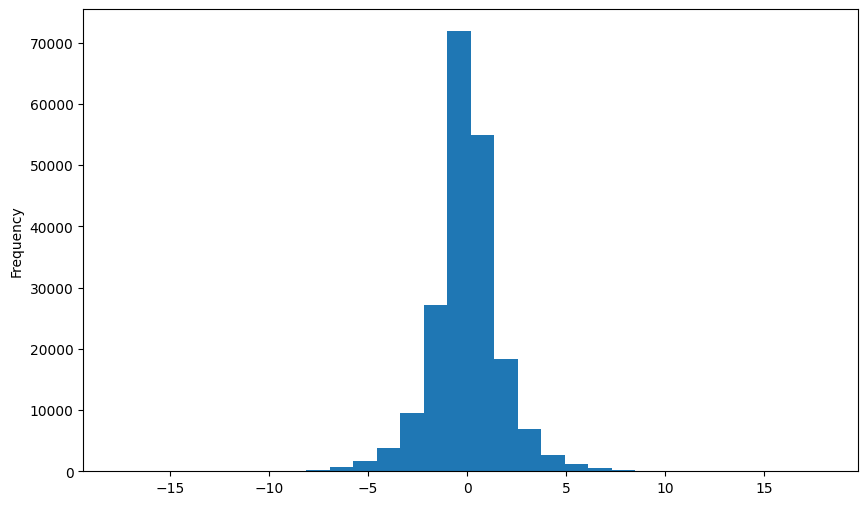

In [ ]:
df_top20_and_y = df[top_20_features_list + ['target']]
df_top20_and_y = df_top20_and_y[df_top20_and_y['target'] > -25]
df_top20_and_y['target'].plot(kind='hist', bins=30, figsize=(10, 6))

In [ ]:
X=df_top20_and_y.drop(columns=['target'])
y=df_top20_and_y['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
mlflow.autolog()


lr.fit(X_train, y_train)

2025/04/16 08:41:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/04/16 08:41:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/16 08:41:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/16 08:41:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/04/16 08:41:49 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/16 08:41:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/16 08:41:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '87faeb411e28408bb26b10f05f3500e7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mse)
print(r2)
print(mae)
print(rmse)

2.908930728280858
0.01919277181439838
1.1912119179069978
1.7055587730362323


In [ ]:

models = {
   # "Ridge": Pipeline([("scaler", StandardScaler()), ("model", Ridge())]),
    #"Lasso": Pipeline([("scaler", StandardScaler()), ("model", Lasso())]),
    #"ElasticNet": Pipeline([("scaler", StandardScaler()), ("model", ElasticNet())]),
    #"KNN": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor())]),
    "BayesianRidge": Pipeline([("scaler", StandardScaler()), ("model", BayesianRidge())]),

    # No scaler
    #"RandomForest": Pipeline([("model", RandomForestRegressor(max_samples=0.8))]),
    "GradientBoosting": Pipeline([("model", GradientBoostingRegressor())]),
    "DecisionTree": Pipeline([("model", DecisionTreeRegressor())]),
    "AdaBoost": Pipeline([("model", AdaBoostRegressor())]),
    "XGBoost": Pipeline([("model", XGBRegressor(objective='reg:squarederror'))]),
    "LGBMRegressor": Pipeline([("model", LGBMRegressor(objective='huber'))]),
    "CatBoost": Pipeline([("model", CatBoostRegressor(verbose=0))])


}

In [ ]:
param_grids = {
    #"Ridge": {"model__alpha": np.logspace(-3, 3, 30)},
    #"Lasso": {"model__alpha": np.logspace(-3, 3, 30)},
    #"ElasticNet": {
       # "model__alpha": np.logspace(-3, 3, 20),
      #  "model__l1_ratio": np.linspace(0, 1, 10)
    #},
    #"RandomForest": {
        #"model__n_estimators": [100, 200],
        #"model__max_depth": [None, 10, 20],
        #"model__min_samples_split": [2, 5]

   # },
    "GradientBoosting": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.01, 0.1],
        "model__max_depth": [3, 5]
    },
    "DecisionTree": {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5]
    },

    #"KNN": {
        #"model__n_neighbors": [3, 5, 10],
        #"model__weights": ['uniform', 'distance']
    #},
    "BayesianRidge": {
        "model__alpha_1": Real(1e-6, 1e-1, prior='log-uniform'),
        "model__alpha_2": Real(1e-6, 1e-1, prior='log-uniform'),
        "model__lambda_1": Real(1e-6, 1e-1, prior='log-uniform'),
        "model__lambda_2": Real(1e-6, 1e-1, prior='log-uniform')
    },
    "AdaBoost": {
        "model__n_estimators": [50, 100],
        "model__learning_rate": [0.01, 0.1, 1]
    },
    "XGBoost": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5],
        "model__learning_rate": [0.01, 0.1]
    },
    "LGBMRegressor": {
        "model__n_estimators": [100, 200],
        "model__num_leaves": [31, 50],
        "model__learning_rate": [0.01, 0.1]
    }
}

In [ ]:
mlflow.autolog()
# CaV and scoring
cv = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = {
    "rmse": make_scorer(mean_squared_error, greater_is_better=False),
}

# Save path
folder_path = '/content/drive/MyDrive/ColabOutputs'
os.makedirs(folder_path, exist_ok=True)

results = {}

# Main loop
for name, pipeline in models.items():
    print(f"\n Tuning: {name}")
    param_grid = param_grids.get(name, {})

    if param_grid:
        search = BayesSearchCV(
            estimator=pipeline,
            search_spaces=param_grid,
            n_iter=20,
            cv=cv,
            scoring=scoring,
            refit="rmse",
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
    else:
        print(" No parameters to tune, fitting directly...")
        search = pipeline

    # Fit model
    search.fit(X_train, y_train)

    # Results
    if isinstance(search, BayesSearchCV):
        best_model = search.best_estimator_
        best_params = search.best_params_
        best_rmse = np.sqrt(-search.best_score_)
    else:
        best_model = search
        best_params = {}
        best_rmse = np.nan

    # Test evaluation
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        "best_estimator": best_model,
        "best_score_rmse": best_rmse,
        "test_score_rmse": test_rmse,
        "best_params": best_params
    }

    # Save model
    save_path = os.path.join(folder_path, f"{name}_best_model.pkl")
    joblib.dump(best_model, save_path)
    print(f" Saved {name} model to {save_path}")

In [ ]:
baseline_rmse = 3.84
baseline_R_squared = 0.015

summary_data = []

for name, res in results.items():
    test_rmse = res["test_score_rmse"]
    cv_rmse = res["best_score_rmse"]

    # Calculate improvement score for RMSE
    test_score_rmse_percent = (1 - (test_rmse / baseline_rmse)) * 100


    summary_data.append({
        "Model": name,
        "CV_RMSE": round(cv_rmse, 4),
        "Test_RMSE": round(test_rmse, 4),
        "Score_%_RMSE": round(test_score_rmse_percent, 2),
        "Best_Params": res["best_params"]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data).sort_values(by="Test_RMSE")

# Display table
print("\n Model Performance Summary:")
print(summary_df[["Model", "CV_RMSE", "Test_RMSE",  "Score_%_RMSE", ]].to_string(index=False))

# Print Best Model
best_model_row = summary_df.iloc[0]
print(f"\n Best Model: {best_model_row['Model']}")
print(f"Test RMSE: {best_model_row['Test_RMSE']}")
print(f"RMSE Improvement: {best_model_row['Score_%_RMSE']}%")
print(f"Best Params: {best_model_row['Best_Params']}")


 Model Performance Summary:
           Model  CV_RMSE  Test_RMSE  Score_%_RMSE
         XGBoost   1.6820     1.6837         56.15
GradientBoosting   1.6835     1.6845         56.13
   LGBMRegressor   1.6854     1.6880         56.04
   BayesianRidge   1.7004     1.7056         55.58
        AdaBoost   1.7050     1.7099         55.47
    DecisionTree   1.7551     1.7399         54.69

 Best Model: XGBoost
Test RMSE: 1.6837
RMSE Improvement: 56.15%
Best Params: OrderedDict([('model__learning_rate', 0.06000424671468068), ('model__max_depth', 5), ('model__n_estimators', 200)])


In [ ]:
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred


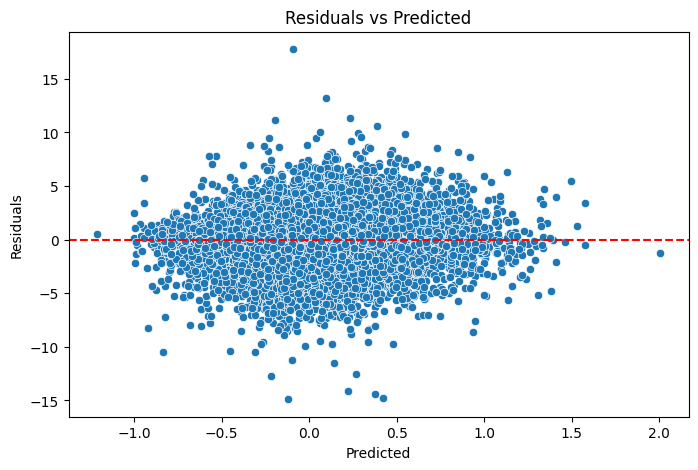

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

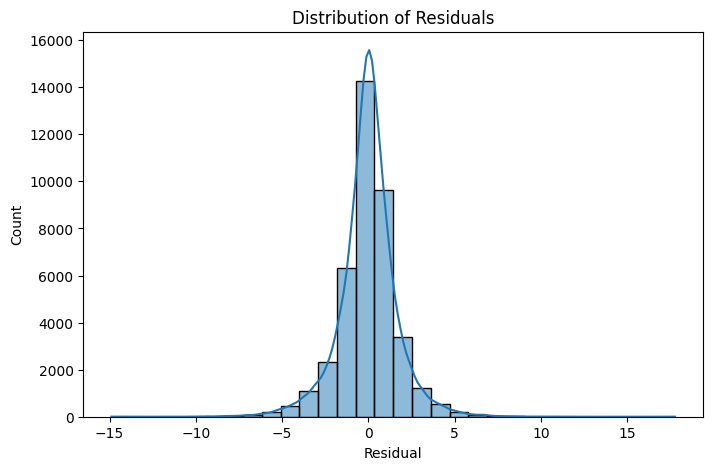

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()